In [1]:
import os
import pandas as pd
import nltk
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
api_key = '6812b772e9544b36a8918b7b1647d991'

newsapi = NewsApiClient(api_key= api_key)

In [86]:
# Fetch the Etherium news articles
eth_articles = newsapi.get_everything(q='ETH',
                                      language='en',
                                      sort_by='relevancy',
                                      )
eth_articles

{'status': 'ok',
 'totalResults': 2538,
 'articles': [{'source': {'id': None, 'name': 'Slashdot.org'},
   'author': 'BeauHD',
   'title': 'Ethereum Mining No Longer Profitable For Many Miners As Energy Prices, ETH Dip Cause Perfect Storm',
   'description': 'For the first time since 2020, Ethereum mining has become unprofitable for many miners connected to a traditional energy grid. CryptoSlate reports: The price of Ethereum has dropped below $1,250 while energy prices are skyrocketing. The average cost of electr…',
   'url': 'https://news.slashdot.org/story/22/06/17/2212233/ethereum-mining-no-longer-profitable-for-many-miners-as-energy-prices-eth-dip-cause-perfect-storm',
   'urlToImage': 'https://a.fsdn.com/sd/topics/bitcoin_64.png',
   'publishedAt': '2022-06-18T02:02:00Z',
   'content': 'The price of Ethereum has dropped below $1,250 while energy prices are skyrocketing. The average cost of electricity in states such as New England, Connecticut, Maine, Massachusetts, New Hampshire,

In [114]:
# Fetch the Dogecoin news articles
dog_articles = newsapi.get_everything(q='DOG',
                                      language='en',
                                      sort_by='relevancy',
                                      )
dog_articles

{'status': 'ok',
 'totalResults': 13031,
 'articles': [{'source': {'id': None, 'name': 'New York Times'},
   'author': 'Sarah Lyall',
   'title': 'How Wasabi, the 2021 Westminister Dog Show Winner, Spends Retirement',
   'description': 'Last year’s Westminster dog show winner was not in it for the money — there is no prize money — and he is very much a dog, even if it can be hard to tell from a distance.',
   'url': 'https://www.nytimes.com/2022/06/21/sports/wasabi-westminster-best-in-show.html',
   'urlToImage': 'https://static01.nyt.com/images/2022/06/21/multimedia/21westminster-wasabi1/21westminster-wasabi1-facebookJumbo-v2.jpg',
   'publishedAt': '2022-06-21T15:00:20Z',
   'content': 'EAST BERLIN, Pa. For a brief, shining moment last summer, Wasabi the Pekingese was the most celebrated dog in America, all hair and hauteur as he posed next to his best in show trophy at the Westmins… [+7311 chars]'},
  {'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   't

In [115]:
# Fetch the Cardano news articles
ada_articles = newsapi.get_everything(q='ADA',
                                      language='en',
                                      sort_by='relevancy',
                                      )
ada_articles

{'status': 'ok',
 'totalResults': 1769,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': None,
   'title': 'BBC pundits predict Euro 2022: Can England go all the way?',
   'description': "Who will win Euro 2022? Who will be the tournament's top goalscorer? Which team can cause an upset? BBC pundits predict what will happen at this summer's tournament.",
   'url': 'https://www.bbc.co.uk/sport/football/61820697',
   'urlToImage': 'https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/CF46/production/_125726035_gettyimages-827008970.jpg',
   'publishedAt': '2022-07-04T05:11:21Z',
   'content': "Vivianne Miedema (left), Lauren Hemp (centre) and Marie-Antoinette Katoto (right) are expected to be stars at this summer's tournament\r\n<table><tr><th>Uefa Women's Euro 2022</th></tr>\r\n<tr><td>Host c… [+8281 chars]"},
  {'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Christina Paulos Syversen and Helge Johan Pettersen Kalleklev',
   'title': 'Wom

In [116]:
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [117]:
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,"The price of Ethereum has dropped below $1,250...",0.2732,0.000,0.937,0.063
1,"Crypto Winter It May Be, But Ethereum Looks Li...",0.2500,0.038,0.897,0.064
2,Sound waves can also steer objects inside orga...,0.0000,0.000,1.000,0.000
3,Celsius has not said what it plans to do next\...,0.0000,0.000,1.000,0.000
4,Improved endurance thanks to the exomuscle\r\n...,0.7184,0.000,0.829,0.171
...,...,...,...,...,...
95,As the price of bitcoin (BTC) last week droppe...,0.0772,0.069,0.853,0.077
96,"Designer News is a large, global community of ...",0.4019,0.000,0.838,0.162
97,"Don't miss CoinDesk's Consensus 2022, the must...",0.7831,0.000,0.780,0.220
98,I was woken at eight this morning (BST) by my ...,-0.4767,0.094,0.906,0.000


In [118]:
dog_sentiment_df = get_sentiment_score(dog_articles, 'content')
dog_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,"EAST BERLIN, Pa. For a brief, shining moment l...",0.8479,0.000,0.815,0.185
1,As if official confirmation was actually neede...,-0.3400,0.066,0.934,0.000
2,The Last of Us Part 1 is coming. Again. Naught...,0.0000,0.000,1.000,0.000
3,Famed American architect Frank Lloyd Wright de...,0.3612,0.000,0.928,0.072
4,I didnt realise how squished and small we had ...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...
95,"NEW YORK -- In a decisive chowdown comeback, r...",0.6808,0.000,0.855,0.145
96,The live action remake machine at Disney has b...,0.3182,0.000,0.938,0.062
97,"When I think of my childhood, I think of all t...",0.0000,0.000,1.000,0.000
98,"Congratulations, you did it! You welcomed a sw...",0.9601,0.000,0.592,0.408


In [119]:
ada_sentiment_df = get_sentiment_score(ada_articles, 'content')
ada_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,"Vivianne Miedema (left), Lauren Hemp (centre) ...",0.0000,0.000,1.000,0.000
1,This article is part of the Guardians Womens E...,0.6369,0.000,0.881,0.119
2,The race for the Womens Euro 2022 Golden Boot ...,0.8350,0.000,0.812,0.188
3,After Lucy Bronze signed for Barcelona last Sa...,0.8957,0.000,0.753,0.247
4,Northern Ireland had a far from fairytale star...,-0.4215,0.078,0.922,0.000
...,...,...,...,...,...
95,The days when Barcelonas harbor was thronged w...,0.0000,0.000,1.000,0.000
96,Cameroon’s Cyrielle Raingou has won the Kirch ...,0.9325,0.000,0.689,0.311
97,A person looks out at an oil platform off the ...,0.0000,0.000,1.000,0.000
98,Freshman series “Abbott Elementary” is leading...,0.2023,0.064,0.848,0.088


In [120]:
# Describe the Etherium Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.00000
mean,0.115862,0.044630,0.880170,0.07519
std,0.441863,0.062749,0.079821,0.06810
min,-0.868900,0.000000,0.709000,0.00000
25%,-0.201025,0.000000,0.820250,0.00000
50%,0.115350,0.000000,0.874000,0.06350
75%,0.445000,0.082250,0.938250,0.13050
max,0.783100,0.224000,1.000000,0.23800


In [121]:
# Describe the Dogecoin Sentiment
dog_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.049140,0.067980,0.845120,0.086900
std,0.566820,0.077395,0.098384,0.093097
min,-0.917800,0.000000,0.522000,0.000000
25%,-0.494375,0.000000,0.800250,0.000000
50%,0.038700,0.061500,0.854000,0.072000
75%,0.540300,0.120250,0.914250,0.138250
max,0.978600,0.281000,1.000000,0.478000


In [122]:
# Describe the Cardano Sentiment
ada_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.00000,100.000000,100.00000
mean,0.148090,0.03908,0.884150,0.07679
std,0.471077,0.06208,0.097769,0.08736
min,-0.911800,0.00000,0.605000,0.00000
25%,-0.044475,0.00000,0.835500,0.00000
50%,0.128000,0.00000,0.903000,0.05500
75%,0.498075,0.07600,0.952250,0.11625
max,0.932500,0.31800,1.000000,0.34000


In [123]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [124]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [125]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
   
        
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
           
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    return lem

In [126]:
tokenizer(eth_sentiment_df.iloc[0]['content'])

['price',
 'ethereum',
 'dropped',
 '1250',
 'energy',
 'price',
 'skyrocketing',
 'average',
 'cost',
 'electricity',
 'state',
 'new',
 'england',
 'connecticut',
 'maine',
 'massachusetts',
 'new',
 'hampshire',
 '1365',
 'char']

In [127]:
tokenizer(dog_sentiment_df.iloc[0]['content'])

['east',
 'berlin',
 'pa',
 'brief',
 'shining',
 'moment',
 'last',
 'summer',
 'wasabi',
 'pekinese',
 'celebrated',
 'dog',
 'america',
 'hair',
 'hauteur',
 'posed',
 'next',
 'best',
 'show',
 'trophy',
 'westmins',
 '7311',
 'char']

In [128]:
tokenizer(ada_sentiment_df.iloc[0]['content'])

['vivianne',
 'miedema',
 'left',
 'lauren',
 'hemp',
 'centre',
 'marieantoinette',
 'katoto',
 'right',
 'expected',
 'star',
 'summer',
 'tournamenttabletrthuefa',
 'woman',
 'euro',
 '2022thtrtrtdhost',
 'c',
 '8281',
 'char']

In [129]:
# Create a new tokens column for Etherium
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,"The price of Ethereum has dropped below $1,250...",0.2732,0.000,0.937,0.063,"[price, ethereum, dropped, 1250, energy, price..."
1,"Crypto Winter It May Be, But Ethereum Looks Li...",0.2500,0.038,0.897,0.064,"[crypto, winter, may, ethereum, look, like, bu..."
2,Sound waves can also steer objects inside orga...,0.0000,0.000,1.000,0.000,"[sound, wave, also, steer, object, inside, org..."
3,Celsius has not said what it plans to do next\...,0.0000,0.000,1.000,0.000,"[celsius, said, plan, nextexhibition, experien..."
4,Improved endurance thanks to the exomuscle\r\n...,0.7184,0.000,0.829,0.171,"[improved, endurance, thanks, exomusclethe, re..."
...,...,...,...,...,...,...
95,As the price of bitcoin (BTC) last week droppe...,0.0772,0.069,0.853,0.077,"[price, bitcoin, btc, last, week, dropped, low..."
96,"Designer News is a large, global community of ...",0.4019,0.000,0.838,0.162,"[designer, news, large, global, community, peo..."
97,"Don't miss CoinDesk's Consensus 2022, the must...",0.7831,0.000,0.780,0.220,"[dont, miss, coindesks, consensus, 2022, musta..."
98,I was woken at eight this morning (BST) by my ...,-0.4767,0.094,0.906,0.000,"[woken, eight, morning, bst, signal, pinging, ..."


In [130]:
# Create a new tokens column for Dogecoin
dog_sentiment_df['tokens'] = dog_sentiment_df['content'].apply(tokenizer)
dog_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,"EAST BERLIN, Pa. For a brief, shining moment l...",0.8479,0.000,0.815,0.185,"[east, berlin, pa, brief, shining, moment, las..."
1,As if official confirmation was actually neede...,-0.3400,0.066,0.934,0.000,"[official, confirmation, actually, needed, lea..."
2,The Last of Us Part 1 is coming. Again. Naught...,0.0000,0.000,1.000,0.000,"[last, u, part, 1, coming, naughty, dog, copre..."
3,Famed American architect Frank Lloyd Wright de...,0.3612,0.000,0.928,0.072,"[famed, american, architect, frank, lloyd, wri..."
4,I didnt realise how squished and small we had ...,0.0000,0.000,1.000,0.000,"[didnt, realise, squished, small, become]"
...,...,...,...,...,...,...
95,"NEW YORK -- In a decisive chowdown comeback, r...",0.6808,0.000,0.855,0.145,"[new, york, decisive, chowdown, comeback, reco..."
96,The live action remake machine at Disney has b...,0.3182,0.000,0.938,0.062,"[live, action, remake, machine, disney, chuggi..."
97,"When I think of my childhood, I think of all t...",0.0000,0.000,1.000,0.000,"[think, childhood, think, trapping, late, 1980..."
98,"Congratulations, you did it! You welcomed a sw...",0.9601,0.000,0.592,0.408,"[congratulation, welcomed, sweet, furry, ball,..."


In [131]:
# Create a new tokens column for Cardano
ada_sentiment_df['tokens'] = ada_sentiment_df['content'].apply(tokenizer)
ada_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,"Vivianne Miedema (left), Lauren Hemp (centre) ...",0.0000,0.000,1.000,0.000,"[vivianne, miedema, left, lauren, hemp, centre..."
1,This article is part of the Guardians Womens E...,0.6369,0.000,0.881,0.119,"[article, part, guardian, woman, euro, 2022, e..."
2,The race for the Womens Euro 2022 Golden Boot ...,0.8350,0.000,0.812,0.188,"[race, woman, euro, 2022, golden, boot, fascin..."
3,After Lucy Bronze signed for Barcelona last Sa...,0.8957,0.000,0.753,0.247,"[lucy, bronze, signed, barcelona, last, saturd..."
4,Northern Ireland had a far from fairytale star...,-0.4215,0.078,0.922,0.000,"[northern, ireland, far, fairytale, start, fir..."
...,...,...,...,...,...,...
95,The days when Barcelonas harbor was thronged w...,0.0000,0.000,1.000,0.000,"[day, barcelona, harbor, thronged, cruise, shi..."
96,Cameroon’s Cyrielle Raingou has won the Kirch ...,0.9325,0.000,0.689,0.311,"[cameroon, cyrielle, raingou, kirch, foundatio..."
97,A person looks out at an oil platform off the ...,0.0000,0.000,1.000,0.000,"[person, look, oil, platform, coast, californi..."
98,Freshman series “Abbott Elementary” is leading...,0.2023,0.064,0.848,0.088,"[freshman, series, abbott, elementary, leading..."


In [132]:
from collections import Counter
from nltk import ngrams

In [133]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

eth_tokens = get_token(eth_sentiment_df)
dog_tokens = get_token(dog_sentiment_df)
ada_tokens = get_token(ada_sentiment_df)

In [134]:
# Generate the Crypto N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [135]:
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('price', 'ethereum'): 2,
 ('ethereum', 'dropped'): 1,
 ('dropped', '1250'): 1,
 ('1250', 'energy'): 1,
 ('energy', 'price'): 1,
 ('price', 'skyrocketing'): 1,
 ('skyrocketing', 'average'): 1,
 ('average', 'cost'): 1,
 ('cost', 'electricity'): 1,
 ('electricity', 'state'): 1,
 ('state', 'new'): 1,
 ('new', 'england'): 1,
 ('england', 'connecticut'): 1,
 ('connecticut', 'maine'): 1,
 ('maine', 'massachusetts'): 1,
 ('massachusetts', 'new'): 1,
 ('new', 'hampshire'): 1,
 ('hampshire', '1365'): 1,
 ('1365', 'char'): 1,
 ('char', 'crypto'): 3,
 ('crypto', 'winter'): 2,
 ('winter', 'may'): 1,
 ('may', 'ethereum'): 1,
 ('ethereum', 'look'): 1,
 ('look', 'like'): 1,
 ('like', 'buy'): 1,
 ('buy', 'winklevoss'): 1,
 ('winklevoss', 'twin'): 1,
 ('twin', 'cutting'): 1,
 ('cutting', 'staff'): 1,
 ('staff', 'gemini'): 1,
 ('gemini', 'say'): 1,
 ('say', 'crypto'): 1,
 ('winter', 'upon'): 1,
 ('upon', 'u'): 1,
 ('u', 'price'): 1,
 ('ethereum', 'cryptocurrency'): 1,
 ('cryptocurrency', 'eth'): 1,
 ('

In [136]:
bigram_dog = bigram_counter(dog_tokens, 2)
bigram_dog

{('east', 'berlin'): 1,
 ('berlin', 'pa'): 1,
 ('pa', 'brief'): 1,
 ('brief', 'shining'): 1,
 ('shining', 'moment'): 1,
 ('moment', 'last'): 1,
 ('last', 'summer'): 1,
 ('summer', 'wasabi'): 1,
 ('wasabi', 'pekinese'): 1,
 ('pekinese', 'celebrated'): 1,
 ('celebrated', 'dog'): 1,
 ('dog', 'america'): 1,
 ('america', 'hair'): 1,
 ('hair', 'hauteur'): 1,
 ('hauteur', 'posed'): 1,
 ('posed', 'next'): 1,
 ('next', 'best'): 1,
 ('best', 'show'): 1,
 ('show', 'trophy'): 1,
 ('trophy', 'westmins'): 1,
 ('westmins', '7311'): 1,
 ('7311', 'char'): 1,
 ('char', 'official'): 1,
 ('official', 'confirmation'): 1,
 ('confirmation', 'actually'): 1,
 ('actually', 'needed'): 1,
 ('needed', 'leak'): 1,
 ('leak', 'earlier'): 1,
 ('earlier', 'today'): 1,
 ('today', 'remake'): 1,
 ('remake', '2013s'): 1,
 ('2013s', 'last'): 1,
 ('last', 'u'): 7,
 ('u', 'coming'): 1,
 ('coming', 'playstation'): 2,
 ('playstation', '5'): 3,
 ('5', 'september'): 1,
 ('september', '2nd'): 1,
 ('2nd', 'sony'): 1,
 ('sony', 'put

In [137]:
bigram_ada = bigram_counter(ada_tokens, 2)
bigram_ada

{('vivianne', 'miedema'): 1,
 ('miedema', 'left'): 1,
 ('left', 'lauren'): 1,
 ('lauren', 'hemp'): 1,
 ('hemp', 'centre'): 1,
 ('centre', 'marieantoinette'): 1,
 ('marieantoinette', 'katoto'): 1,
 ('katoto', 'right'): 1,
 ('right', 'expected'): 1,
 ('expected', 'star'): 1,
 ('star', 'summer'): 1,
 ('summer', 'tournamenttabletrthuefa'): 1,
 ('tournamenttabletrthuefa', 'woman'): 1,
 ('woman', 'euro'): 7,
 ('euro', '2022thtrtrtdhost'): 1,
 ('2022thtrtrtdhost', 'c'): 1,
 ('c', '8281'): 1,
 ('8281', 'char'): 1,
 ('char', 'article'): 1,
 ('article', 'part'): 1,
 ('part', 'guardian'): 1,
 ('guardian', 'woman'): 1,
 ('euro', '2022'): 4,
 ('2022', 'expert'): 1,
 ('expert', 'network'): 1,
 ('network', 'cooperation'): 1,
 ('cooperation', 'best'): 1,
 ('best', 'medium'): 1,
 ('medium', 'organisation'): 1,
 ('organisation', '16'): 1,
 ('16', 'country'): 1,
 ('country', 'qualified'): 1,
 ('qualified', 'theguardiancom'): 1,
 ('theguardiancom', 'running'): 1,
 ('running', '5659'): 1,
 ('5659', 'char')

In [138]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [139]:
# Get the top 10 words for Etherium
token_count(eth_tokens, 10)

[('char', 99),
 ('crypto', 31),
 ('market', 21),
 ('ethereum', 19),
 ('eth', 18),
 ('new', 16),
 ('blockchain', 15),
 ('price', 10),
 ('nft', 10),
 ('first', 10)]

In [140]:
# Get the top 10 words for Dogecoin
token_count(dog_tokens, 10)

[('char', 96),
 ('dog', 61),
 ('new', 12),
 ('last', 11),
 ('u', 10),
 ('year', 10),
 ('game', 9),
 ('people', 9),
 ('may', 9),
 ('like', 8)]

In [141]:
# Get the top 10 words for Cardano
token_count(ada_tokens, 10)

[('char', 100),
 ('ada', 22),
 ('woman', 13),
 ('2022', 13),
 ('year', 13),
 ('new', 11),
 ('one', 10),
 ('two', 9),
 ('euro', 8),
 ('england', 8)]

# Word Clouds 

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0,7.0]

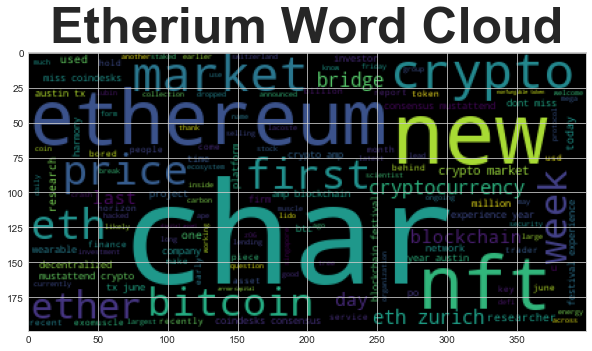

In [143]:
# Generate the Etherium word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Etherium Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

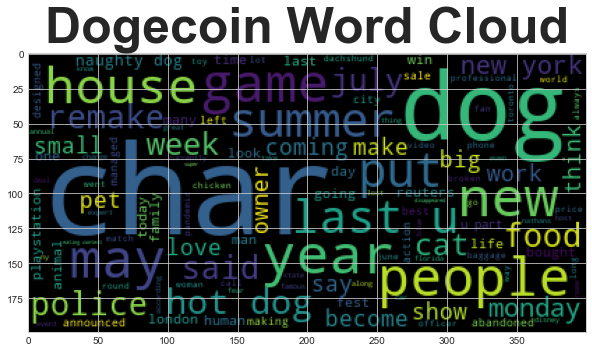

In [144]:
# Generate the Dogecoin word cloud
wc = WordCloud().generate(' '.join(dog_tokens))
plt.title("Dogecoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

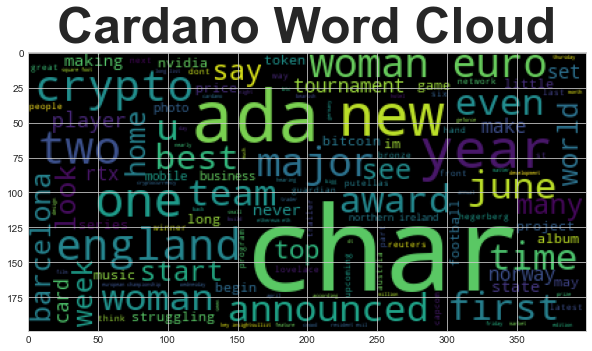

In [145]:
# Generate the Cardano word cloud
wc = WordCloud().generate(' '.join(ada_tokens))
plt.title("Cardano Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

# Machine Learning for sentiment prediction

In [146]:
# Removing unecessary columns to keep the data simple 
eth_sentiment_df.drop(columns=[
    'Negative', 'Neutral', 'Positive', 'tokens'],
        inplace=True)
eth_sentiment_df.sample(10)

,content,Compound
16,<ul><li>Three Arrows Capital currently faces p...,0.3818
42,Protein-rich microalgae is already being used ...,0.0000
24,"Oil and gas prices are currently on the rise, ...",0.6808
59,A new analysis of a Martian meteorite is chall...,0.1531
27,"June 29, 2022 AT 10:00 am\r\nMyoshirt is a Wea...",0.7506
74,Give the dog its due: Shiba Inu(SHIB -3.97%) h...,0.6705
88,"Earlier this year, the renowned Los Angeles ph...",0.4404
86,A New York City office building went on sale f...,0.0000
95,As the price of bitcoin (BTC) last week droppe...,0.0772
22,Coastal California's redwood forests—with thei...,-0.0286


In [147]:
# Removing unecessary columns to keep the data simple 
dog_sentiment_df.drop(columns=[
    'Negative', 'Neutral', 'Positive', 'tokens'],
        inplace=True)
dog_sentiment_df.sample(10)

,content,Compound
44,There was a lot of big talk during the pandemi...,-0.8402
12,"LONDON, June 23 (Reuters) - From small Dachshu...",0.6486
69,The dog days of summer are officially here. Wh...,-0.1280
8,Placeholder while article actions load\r\nIt w...,0.7650
23,My refrigerator is broken. Not broken in a way...,-0.3919
54,"Tip, a young hunting dog, pads up a goat track...",0.4588
6,Enlarge/ An Eastern Gray Wolf is a mix of Sibe...,0.8126
47,"Ikea just deleted my dog. Well, I guess I dele...",0.4767
75,NEW YORK -- Frankfurter-munching phenom Joey J...,0.5859
17,A Toronto woman says a dog she rescued from th...,0.0258


In [148]:
# Removing unecessary columns to keep the data simple 
ada_sentiment_df.drop(columns=[
    'Negative', 'Neutral', 'Positive', 'tokens'],
        inplace=True)
ada_sentiment_df.sample(10)

,content,Compound
6,Sorting algorithms are to computer science wha...,-0.5399
81,Key Insights:\r\n<ul><li>It was a bearish Frid...,0.0000
27,"Welcome to Moving the Goalposts, the Guardians...",0.4588
42,The Schoolhouse Hotel is the world's first ADA...,0.6249
10,(Reuters) - Hobby Lobby Stores Inc unlawfully ...,-0.8402
76,"A truth. The power limits: AD102, 800W; AD103 ...",0.3182
1,This article is part of the Guardians Womens E...,0.6369
12,Barcelona is for sale but not to the people wh...,0.0000
83,Northern Ireland trained at St Mary's on the e...,-0.4019
73,Legislators this year passed a bill intended t...,-0.1779


In [149]:
# Labelling Comments Based On Compound score
def Labelling(Rows):
  if(Rows["Compound"] > 0.33):
    Label = "Positive"
  elif(Rows["Compound"] < -0.33):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [150]:
eth_sentiment_df["sentiment"] = eth_sentiment_df.apply(Labelling, axis = 1)
eth_sentiment_df

,content,Compound,sentiment
0,"The price of Ethereum has dropped below $1,250...",0.2732,Neutral
1,"Crypto Winter It May Be, But Ethereum Looks Li...",0.2500,Neutral
2,Sound waves can also steer objects inside orga...,0.0000,Neutral
3,Celsius has not said what it plans to do next\...,0.0000,Neutral
4,Improved endurance thanks to the exomuscle\r\n...,0.7184,Positive
...,...,...,...
95,As the price of bitcoin (BTC) last week droppe...,0.0772,Neutral
96,"Designer News is a large, global community of ...",0.4019,Positive
97,"Don't miss CoinDesk's Consensus 2022, the must...",0.7831,Positive
98,I was woken at eight this morning (BST) by my ...,-0.4767,Negative


In [151]:
dog_sentiment_df["sentiment"] = dog_sentiment_df.apply(Labelling, axis = 1)
dog_sentiment_df

,content,Compound,sentiment
0,"EAST BERLIN, Pa. For a brief, shining moment l...",0.8479,Positive
1,As if official confirmation was actually neede...,-0.3400,Negative
2,The Last of Us Part 1 is coming. Again. Naught...,0.0000,Neutral
3,Famed American architect Frank Lloyd Wright de...,0.3612,Positive
4,I didnt realise how squished and small we had ...,0.0000,Neutral
...,...,...,...
95,"NEW YORK -- In a decisive chowdown comeback, r...",0.6808,Positive
96,The live action remake machine at Disney has b...,0.3182,Neutral
97,"When I think of my childhood, I think of all t...",0.0000,Neutral
98,"Congratulations, you did it! You welcomed a sw...",0.9601,Positive


In [152]:
ada_sentiment_df["sentiment"] = ada_sentiment_df.apply(Labelling, axis = 1)
ada_sentiment_df

,content,Compound,sentiment
0,"Vivianne Miedema (left), Lauren Hemp (centre) ...",0.0000,Neutral
1,This article is part of the Guardians Womens E...,0.6369,Positive
2,The race for the Womens Euro 2022 Golden Boot ...,0.8350,Positive
3,After Lucy Bronze signed for Barcelona last Sa...,0.8957,Positive
4,Northern Ireland had a far from fairytale star...,-0.4215,Negative
...,...,...,...
95,The days when Barcelonas harbor was thronged w...,0.0000,Neutral
96,Cameroon’s Cyrielle Raingou has won the Kirch ...,0.9325,Positive
97,A person looks out at an oil platform off the ...,0.0000,Neutral
98,Freshman series “Abbott Elementary” is leading...,0.2023,Neutral


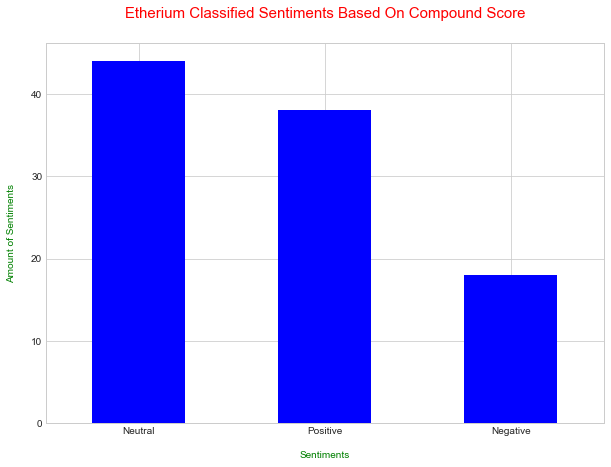

In [153]:
eth_sentiment_df["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Etherium Classified Sentiments Based On Compound Score", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

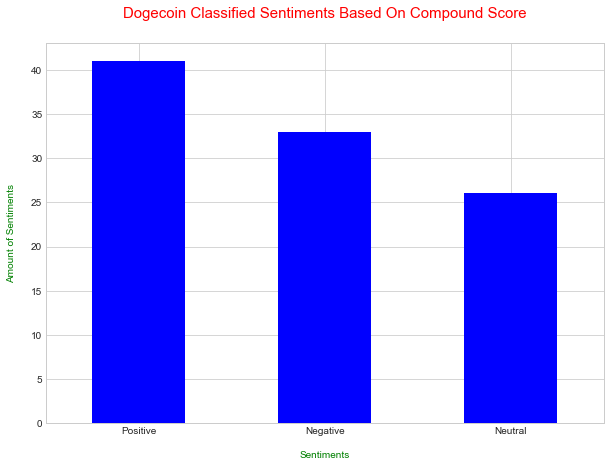

In [154]:
dog_sentiment_df["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Dogecoin Classified Sentiments Based On Compound Score", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

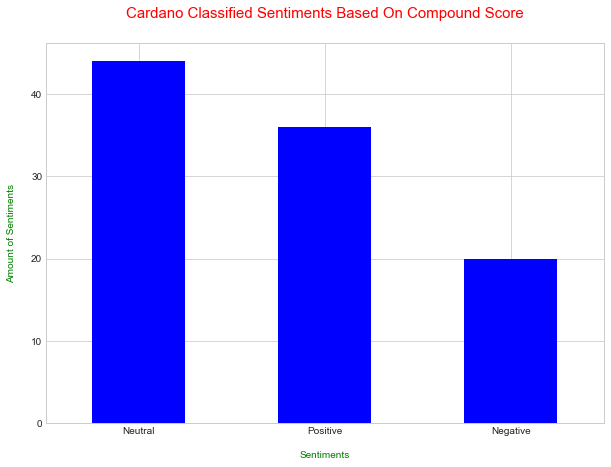

In [155]:
ada_sentiment_df["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Cardano Classified Sentiments Based On Compound Score", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [156]:
eth_sentiment_df['sentiment_score'] = 1
eth_sentiment_df.loc[eth_sentiment_df['Compound'] > 0.33, 'sentiment_score'] = 2
eth_sentiment_df.loc[eth_sentiment_df['Compound'] < -0.33, 'sentiment_score'] = 0
eth_sentiment_df

,content,Compound,sentiment,sentiment_score
0,"The price of Ethereum has dropped below $1,250...",0.2732,Neutral,1
1,"Crypto Winter It May Be, But Ethereum Looks Li...",0.2500,Neutral,1
2,Sound waves can also steer objects inside orga...,0.0000,Neutral,1
3,Celsius has not said what it plans to do next\...,0.0000,Neutral,1
4,Improved endurance thanks to the exomuscle\r\n...,0.7184,Positive,2
...,...,...,...,...
95,As the price of bitcoin (BTC) last week droppe...,0.0772,Neutral,1
96,"Designer News is a large, global community of ...",0.4019,Positive,2
97,"Don't miss CoinDesk's Consensus 2022, the must...",0.7831,Positive,2
98,I was woken at eight this morning (BST) by my ...,-0.4767,Negative,0


In [157]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Etherium Analysis

In [158]:
# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X_eth = TF_IDF.fit_transform(eth_sentiment_df["content"])
X_eth.shape

(100, 2856)

In [159]:
# Declaring our target variable
y_eth = eth_sentiment_df["sentiment"]

In [160]:
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [161]:
Counter(y_eth)

Counter({'Neutral': 44, 'Positive': 38, 'Negative': 18})

In [162]:
Balancer = SMOTE(random_state = 42)
X_eth_final, y_eth_final = Balancer.fit_resample(X_eth, y_eth)

In [163]:
Counter(y_eth_final)

Counter({'Neutral': 44, 'Positive': 44, 'Negative': 44})

In [164]:
# Splitting Dataset
from sklearn.model_selection import train_test_split


X_eth_train, X_eth_test, y_eth_train, y_eth_test = train_test_split(X_eth_final, y_eth_final, test_size = 0.25, random_state = 42)

## Model Selection and Evaluation

In [165]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

In [166]:
# Logistic Regression for Etherium
lg_eth_clf = LogisticRegression()     # L2 regularization is applied by default
lg_eth_clf.fit(X_eth_train, y_eth_train)
lg_eth_pred = lg_eth_clf.predict(X_eth_test)
lg_eth_accuracy = accuracy_score(lg_eth_pred, y_eth_test)
print("Logistic Regression Accuracy:", '{:.2%}'.format(lg_eth_accuracy))

# Random Forest for Etherium
rf_eth_clf = RandomForestClassifier(n_estimators = 200, random_state=200)
rf_eth_clf.fit(X_eth_train, y_eth_train)
rf_eth_pred = rf_eth_clf.predict(X_eth_test)
rf_eth_accuracy = accuracy_score(rf_eth_pred, y_eth_test)
print("Random Forest Accuracy:", '{:.2%}'.format(rf_eth_accuracy))


# Decision Tree for Etherium
dt_eth_clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
dt_eth_clf.fit(X_eth_train,y_eth_train)
dt_eth_pred = dt_eth_clf.predict(X_eth_test)
dt_eth_accuracy = accuracy_score(dt_eth_pred, y_eth_test)
print("Decision Tree Accuracy:", '{:.2%}'.format(dt_eth_accuracy))


# SVC for Etherium
svc_eth_clf = SVC(kernel='linear', C = 1.0)  
svc_eth_clf.fit(X_eth_train,y_eth_train)
svc_eth_pred = svc_eth_clf.predict(X_eth_test)
svc_eth_accuracy = accuracy_score(svc_eth_pred, y_eth_test)
print("SVC Accuracy:", '{:.2%}'.format(svc_eth_accuracy))


# KNN for Etherium
knn_eth_clf = KNeighborsClassifier(n_neighbors=3) 
knn_eth_clf.fit(X_eth_train,y_eth_train)
knn_eth_pred = knn_eth_clf.predict(X_eth_test)
knn_eth_accuracy = accuracy_score(knn_eth_pred, y_eth_test)
print("KNN Accuracy:", '{:.2%}'.format(knn_eth_accuracy))

Logistic Regression Accuracy: 72.73%
Random Forest Accuracy: 66.67%
Decision Tree Accuracy: 48.48%
SVC Accuracy: 72.73%
KNN Accuracy: 33.33%


In [167]:
eth_lg_ConfusionMatrix = confusion_matrix(y_eth_test, lg_eth_pred)
print(classification_report(y_eth_test, lg_eth_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         7
     Neutral       0.57      1.00      0.73        12
    Positive       1.00      0.36      0.53        14

    accuracy                           0.73        33
   macro avg       0.86      0.79      0.75        33
weighted avg       0.84      0.73      0.70        33



In [168]:
eth_rf_ConfusionMatrix = confusion_matrix(y_eth_test, rf_eth_pred)
print(classification_report(y_eth_test, rf_eth_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.71      0.83         7
     Neutral       0.52      1.00      0.69        12
    Positive       1.00      0.36      0.53        14

    accuracy                           0.67        33
   macro avg       0.84      0.69      0.68        33
weighted avg       0.83      0.67      0.65        33



In [169]:
eth_svc_ConfusionMatrix = confusion_matrix(y_eth_test, svc_eth_pred)
print(classification_report(y_eth_test, svc_eth_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         7
     Neutral       0.57      1.00      0.73        12
    Positive       1.00      0.36      0.53        14

    accuracy                           0.73        33
   macro avg       0.86      0.79      0.75        33
weighted avg       0.84      0.73      0.70        33



# Doge Coin Analysis

In [170]:
# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X_dog = TF_IDF.fit_transform(dog_sentiment_df["content"])
X_dog.shape

(100, 3048)

In [171]:
# Declaring our target variable
y_dog = dog_sentiment_df["sentiment"]

In [172]:
Counter(y_dog)

Counter({'Positive': 41, 'Negative': 33, 'Neutral': 26})

In [173]:
Balancer = SMOTE(random_state = 42)
X_dog_final, y_dog_final = Balancer.fit_resample(X_dog, y_dog)

In [174]:
Counter(y_dog_final)

Counter({'Positive': 41, 'Negative': 41, 'Neutral': 41})

In [175]:
X_dog_train, X_dog_test, y_dog_train, y_dog_test = train_test_split(X_dog_final, y_dog_final, test_size = 0.25, random_state = 42)

In [176]:
# Logistic Regression for DogeCoin
lg_dog_clf = LogisticRegression()     # L2 regularization is applied by default
lg_dog_clf.fit(X_dog_train, y_dog_train)
lg_dog_pred = lg_dog_clf.predict(X_dog_test)
lg_dog_accuracy = accuracy_score(lg_dog_pred, y_dog_test)
print("Logistic Regression Accuracy:", '{:.2%}'.format(lg_dog_accuracy))


# Random Forest for DogeCoin
rf_dog_clf = RandomForestClassifier(n_estimators = 200, random_state=200)
rf_dog_clf.fit(X_dog_train, y_dog_train)
rf_dog_pred = rf_dog_clf.predict(X_dog_test)
rf_dog_accuracy = accuracy_score(rf_dog_pred, y_dog_test)
print("Random Forest Accuracy:", '{:.2%}'.format(rf_dog_accuracy))

# Decision Tree for DogeCoin
dt_dog_clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
dt_dog_clf.fit(X_dog_train,y_dog_train)
dt_dog_pred = dt_dog_clf.predict(X_dog_test)
dt_dog_accuracy = accuracy_score(dt_dog_pred, y_dog_test)
print("Decision Tree Accuracy:", '{:.2%}'.format(dt_dog_accuracy))

# SVC for DogeCoin
svc_dog_clf = SVC(kernel='linear', C = 1.0)  
svc_dog_clf.fit(X_dog_train,y_dog_train)
svc_dog_pred = svc_dog_clf.predict(X_dog_test)
svc_dog_accuracy = accuracy_score(svc_dog_pred, y_dog_test)
print("SVC Accuracy:", '{:.2%}'.format(svc_dog_accuracy))


# KNN for Etherium
knn_dog_clf = KNeighborsClassifier(n_neighbors=3) 
knn_dog_clf.fit(X_dog_train,y_dog_train)
knn_dog_pred = knn_dog_clf.predict(X_dog_test)
knn_dog_accuracy = accuracy_score(knn_dog_pred, y_dog_test)
print("KNN Accuracy:", '{:.2%}'.format(knn_dog_accuracy))

Logistic Regression Accuracy: 64.52%
Random Forest Accuracy: 45.16%
Decision Tree Accuracy: 32.26%
SVC Accuracy: 64.52%
KNN Accuracy: 45.16%


In [177]:
dog_lg_ConfusionMatrix = confusion_matrix(y_dog_test, lg_dog_pred)
print(classification_report(y_dog_test, lg_dog_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.33      0.46         9
     Neutral       1.00      0.62      0.76        13
    Positive       0.47      1.00      0.64         9

    accuracy                           0.65        31
   macro avg       0.74      0.65      0.62        31
weighted avg       0.77      0.65      0.64        31



In [178]:
dog_rf_ConfusionMatrix = confusion_matrix(y_dog_test, rf_dog_pred)
print(classification_report(y_dog_test, rf_dog_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.11      0.20         9
     Neutral       1.00      0.31      0.47        13
    Positive       0.35      1.00      0.51         9

    accuracy                           0.45        31
   macro avg       0.78      0.47      0.39        31
weighted avg       0.81      0.45      0.40        31



In [179]:
dog_svc_ConfusionMatrix = confusion_matrix(y_dog_test, svc_dog_pred)
print(classification_report(y_dog_test, svc_dog_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.33      0.50         9
     Neutral       1.00      0.62      0.76        13
    Positive       0.45      1.00      0.62         9

    accuracy                           0.65        31
   macro avg       0.82      0.65      0.63        31
weighted avg       0.84      0.65      0.64        31



# Cardano Analysis

In [180]:
# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X_ada = TF_IDF.fit_transform(ada_sentiment_df["content"])
X_ada.shape

(100, 2933)

In [181]:
# Declaring our target variable
y_ada = ada_sentiment_df["sentiment"]

In [182]:
Counter(y_ada)

Counter({'Neutral': 44, 'Positive': 36, 'Negative': 20})

In [183]:
Balancer = SMOTE(random_state = 42)
X_ada_final, y_ada_final = Balancer.fit_resample(X_ada, y_ada)

In [184]:
Counter(y_ada_final)

Counter({'Neutral': 44, 'Positive': 44, 'Negative': 44})

In [185]:
X_ada_train, X_ada_test, y_ada_train, y_ada_test = train_test_split(X_ada_final, y_ada_final, test_size = 0.25, random_state = 42)

In [186]:
# Logistic Regression for DogeCoin
lg_ada_clf = LogisticRegression()     # L2 regularization is applied by default
lg_ada_clf.fit(X_ada_train, y_ada_train)
lg_ada_pred = lg_ada_clf.predict(X_ada_test)
lg_ada_accuracy = accuracy_score(lg_ada_pred, y_ada_test)
print("Logistic Regression Accuracy:", '{:.2%}'.format(lg_ada_accuracy))


# Random Forest for DogeCoin
rf_ada_clf = RandomForestClassifier(n_estimators = 200, random_state=200)
rf_ada_clf.fit(X_ada_train, y_ada_train)
rf_ada_pred = rf_ada_clf.predict(X_ada_test)
rf_ada_accuracy = accuracy_score(rf_ada_pred, y_ada_test)
print("Random Forest Accuracy:", '{:.2%}'.format(rf_ada_accuracy))

# Decision Tree for Cardano
dt_ada_clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
dt_ada_clf.fit(X_ada_train,y_ada_train)
dt_ada_pred = dt_ada_clf.predict(X_ada_test)
dt_ada_accuracy = accuracy_score(dt_ada_pred, y_ada_test)
print("Decision Tree Accuracy:", '{:.2%}'.format(dt_ada_accuracy))


# SVC for Cardano
svc_ada_clf = SVC(kernel='linear', C = 1.0)  
svc_ada_clf.fit(X_ada_train,y_ada_train)
svc_ada_pred = svc_ada_clf.predict(X_ada_test)
svc_ada_accuracy = accuracy_score(svc_ada_pred, y_ada_test)
print("SVC Accuracy:", '{:.2%}'.format(svc_ada_accuracy))


# KNN for Etherium
knn_ada_clf = KNeighborsClassifier(n_neighbors=3) 
knn_ada_clf.fit(X_ada_train,y_ada_train)
knn_ada_pred = knn_ada_clf.predict(X_ada_test)
knn_ada_accuracy = accuracy_score(knn_ada_pred, y_ada_test)
print("KNN Accuracy:", '{:.2%}'.format(knn_ada_accuracy))

Logistic Regression Accuracy: 51.52%
Random Forest Accuracy: 66.67%
Decision Tree Accuracy: 45.45%
SVC Accuracy: 69.70%
KNN Accuracy: 42.42%


In [187]:
ada_lg_ConfusionMatrix = confusion_matrix(y_ada_test, lg_ada_pred)
print(classification_report(y_ada_test, lg_ada_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80        10
     Neutral       0.00      0.00      0.00        13
    Positive       0.41      0.90      0.56        10

    accuracy                           0.52        33
   macro avg       0.40      0.57      0.45        33
weighted avg       0.37      0.52      0.41        33



In [188]:
ada_rf_ConfusionMatrix = confusion_matrix(y_ada_test, rf_ada_pred)
print(classification_report(y_ada_test, rf_ada_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.40      0.57        10
     Neutral       0.54      1.00      0.70        13
    Positive       1.00      0.50      0.67        10

    accuracy                           0.67        33
   macro avg       0.85      0.63      0.65        33
weighted avg       0.82      0.67      0.65        33



In [189]:
ada_svc_ConfusionMatrix = confusion_matrix(y_ada_test, svc_ada_pred)
print(classification_report(y_ada_test, svc_ada_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80        10
     Neutral       0.64      0.54      0.58        13
    Positive       0.67      0.80      0.73        10

    accuracy                           0.70        33
   macro avg       0.70      0.71      0.70        33
weighted avg       0.70      0.70      0.69        33

